In [158]:
from fastquant import get_stock_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tweet Data Preprocessing

In [159]:
tweets = pd.read_csv('tweets.csv')

In [130]:
tweets.columns

Index(['Unnamed: 0', 'date', 'id', 'lang', 'probability', 'sentiment', 'text',
       'ticker'],
      dtype='object')

In [131]:
tweets.drop(columns=['Unnamed: 0'], inplace=True)

In [132]:
tweets

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
203606,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
203607,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
203608,2021-04-13,1.381843e+18,en,0.999841,NEGATIVE,$PLTR update dropped to demand to give us a be...,pltr
203609,2021-04-13,1.381843e+18,en,0.751278,POSITIVE,Our alerted contracts were able to make $78% p...,pltr


In [133]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203611 entries, 0 to 203610
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         203611 non-null  object 
 1   id           203611 non-null  float64
 2   lang         203611 non-null  object 
 3   probability  203611 non-null  float64
 4   sentiment    203611 non-null  object 
 5   text         203611 non-null  object 
 6   ticker       203611 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.9+ MB


In [134]:
tweets = tweets.dropna()

In [135]:
tweets = tweets.reset_index()

In [136]:
tweets.drop(columns=['index'],inplace=True)

In [137]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203611 entries, 0 to 203610
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         203611 non-null  object 
 1   id           203611 non-null  float64
 2   lang         203611 non-null  object 
 3   probability  203611 non-null  float64
 4   sentiment    203611 non-null  object 
 5   text         203611 non-null  object 
 6   ticker       203611 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.9+ MB


In [138]:
sorted(tweets['ticker'].unique())

['aapl', 'amzn', 'msft', 'pltr', 'tsla']

In [139]:
from datetime import datetime
date_obj = datetime.strptime('2021-04-21','%Y-%m-%d')
date1_obj = datetime.strptime('2021-04-12','%Y-%m-%d')

In [140]:
def date_conversion(date):
    return datetime.strptime(date,'%Y-%m-%d')

In [141]:
tweets['date'] = tweets['date'].apply(date_conversion)

In [142]:
tweets

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
203606,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
203607,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
203608,2021-04-13,1.381843e+18,en,0.999841,NEGATIVE,$PLTR update dropped to demand to give us a be...,pltr
203609,2021-04-13,1.381843e+18,en,0.751278,POSITIVE,Our alerted contracts were able to make $78% p...,pltr


In [160]:
start_date = min(tweets['date'])
end_date = max(tweets['date'])

In [161]:
start_date.weekday()

AttributeError: 'str' object has no attribute 'weekday'

In [145]:
end_date.weekday()

1

In [147]:
tweets['day'] = tweets['date'].apply(lambda date: date.weekday())

In [149]:
tweets = tweets[(tweets['day']!=4)&(tweets['day']!=5)]

In [152]:
tweets.drop(columns=['day'], inplace=True)

In [154]:
tweets.reset_index(inplace=True)

In [156]:
tweets.drop(columns=['index'], inplace=True)

In [157]:
tweets

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
148838,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
148839,2021-04-13,1.381844e+18,en,0.999822,NEGATIVE,"RT Palantir might be on pause, but is the opt...",pltr
148840,2021-04-13,1.381843e+18,en,0.999841,NEGATIVE,$PLTR update dropped to demand to give us a be...,pltr
148841,2021-04-13,1.381843e+18,en,0.751278,POSITIVE,Our alerted contracts were able to make $78% p...,pltr


# Figuring out how to get average sentiment

In [105]:
tsla = tweets[tweets['ticker']=='tsla']
len(tsla)

48752

In [8]:
tsla_data = get_stock_data('tsla',start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
tsla_data

,open,high,low,close,volume
dt,,,,,
2021-04-12,685.700012,704.799988,682.090027,701.979980,29135700
2021-04-13,712.700012,763.000000,710.659973,762.320007,44652800
2021-04-14,770.700012,780.789978,728.030029,732.229980,49017400
2021-04-15,743.099976,743.690002,721.309998,738.849976,27848900
2021-04-16,728.650024,749.409973,724.599976,739.780029,27924000


In [10]:
def data_prep(data):
    df = pd.DataFrame(data=None, columns=['fracChange'])
    df['fracChange'] = (data['close']-data['open'])/data['open']

    return df

In [21]:
def calc_avg_sentiment(df,date):
    subdf = tweets[tweets['date'] == date]
    sentiment = subdf['sentiment'].values
    print(len(sentiment))
    avg_sentiment = sum([-1 if s == 'NEGATIVE' else 1 for s in sentiment])/len(sentiment)
    return avg_sentiment

In [22]:
tsla_frac_change = data_prep(tsla_data)

In [23]:
tsla_frac_change

,fracChange
dt,
2021-04-12,0.023742
2021-04-13,0.069623
2021-04-14,-0.049916
2021-04-15,-0.005719
2021-04-16,0.015275


In [24]:
dates = tsla['date'].unique()

In [25]:
avg_sent = []
for date in dates:
    avg_sent.append(calc_avg_sentiment(tsla,date))

452
10695
10286
12705
13089
13832
13416
10147


In [16]:
avg_sent

[-0.048672566371681415,
 -0.032819074333800845,
 -0.008944195994555707,
 -0.046674537583628495,
 -0.061349224539689814,
 -0.0670908039329092,
 -0.11553369111508646,
 -0.05114812259781216]

In [17]:
dates

array(['2021-04-19', '2021-04-18', '2021-04-17', '2021-04-16',
       '2021-04-15', '2021-04-14', '2021-04-13', '2021-04-12'],
      dtype=object)

In [19]:
dates = tweets['date'].unique()
dates = [d for d in dates if type(d)==str and d[0]=='2']

In [20]:
dates

['2021-04-19',
 '2021-04-18',
 '2021-04-17',
 '2021-04-16',
 '2021-04-15',
 '2021-04-14',
 '2021-04-13',
 '2021-04-12']

In [51]:
tsla_frac_change = tsla_frac_change[1:]

In [52]:
tsla_frac_change

,fracChange
dt,
2021-04-13,0.069623
2021-04-14,-0.049916
2021-04-15,-0.005719
2021-04-16,0.015275


In [57]:
avg_sent = list(reversed(avg_sent))

In [59]:
avg_sent = avg_sent[:4]

In [60]:
avg_sent

[-0.05114812259781216,
 -0.11553369111508646,
 -0.0670908039329092,
 -0.061349224539689814]

In [61]:
tsla_frac_change['avg_sent'] = avg_sent

In [62]:
tsla_frac_change

,fracChange,avg_sent
dt,,
2021-04-13,0.069623,-0.051148
2021-04-14,-0.049916,-0.115534
2021-04-15,-0.005719,-0.067091
2021-04-16,0.015275,-0.061349


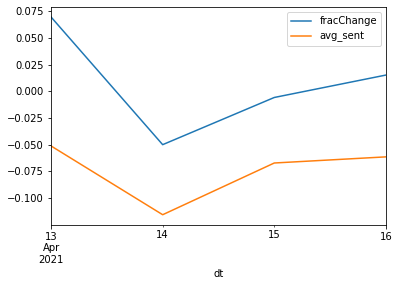

In [65]:
_ = tsla_frac_change.plot()

In [64]:
tsla

,date,id,lang,probability,sentiment,text,ticker
0,2021-04-19,1.383936e+18,en,0.788206,POSITIVE,#btc #chatter #noise #eth #dogecoin \n$spx $sp...,tsla
1,2021-04-19,1.383936e+18,en,0.998966,NEGATIVE,$TSLA crash kills two in #Texas,tsla
2,2021-04-19,1.383936e+18,en,0.949687,POSITIVE,"RT Setups and Watch List, 4/18: $TSLA $SNAP $...",tsla
3,2021-04-19,1.383936e+18,en,0.535232,NEGATIVE,$GOOGL Has been a leader in FANG. Over 2300 we...,tsla
4,2021-04-19,1.383936e+18,en,0.966784,NEGATIVE,Few stocks in the news this weekend \n$DIS $CO...,tsla
...,...,...,...,...,...,...,...
16241,2021-04-12,1.381483e+18,en,0.945080,NEGATIVE,RT Pick your basket? It's April 2026 which gr...,tsla
16242,2021-04-12,1.381483e+18,en,0.996286,NEGATIVE,RT This week there’s a slew of macro indicato...,tsla
16243,2021-04-12,1.381483e+18,en,0.999100,NEGATIVE,"Gamestop Corp. (GME), Square (SQ), Tesla Motor...",tsla
16244,2021-04-12,1.381483e+18,en,0.900235,NEGATIVE,RT Early in $FB (2007)\nEarly in (2011)\nEar...,tsla


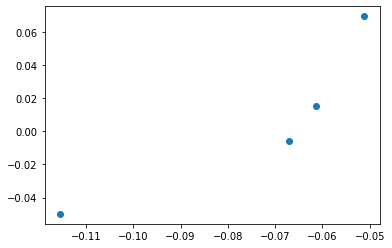

In [67]:
plt.scatter(x=tsla_frac_change['avg_sent'],y=tsla_frac_change['fracChange'])

# General idea of how to get average sentiment / stock data

In [91]:
def gen_data(df,ticker):
    ticker_data = tweets[tweets['ticker']==ticker]
    ticker_prices = get_stock_data(ticker,start_date,end_date)
    ticker_frac_change = data_prep(ticker_prices)
    dates = ticker_data['date'].unique()
    avg_sent = []
    for date in dates:
        avg_sent.append(calc_avg_sentiment(tsla,date))
    ticker_frac_change = ticker_frac_change[1:]
    avg_sent = list(reversed(avg_sent))
    avg_sent = avg_sent[:4]
    ticker_frac_change['avg_sent'] = avg_sent
    ticker_frac_change['ticker'] = ticker
    return ticker_frac_change

In [92]:
tickers = ['tsla', 'amzn', 'msft', 'aapl', 'gme', 'pltr']

In [96]:
data = pd.DataFrame(columns=['fracChange','avg_sent','ticker'])e

In [97]:
for ticker in tickers:
    data = data.append(gen_data(tweets,ticker))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [98]:
data

,fracChange,avg_sent,ticker
2021-04-13,0.069623,-0.051148,tsla
2021-04-14,-0.049916,-0.115534,tsla
2021-04-15,-0.005719,-0.067091,tsla
2021-04-16,0.015275,-0.061349,tsla
2021-04-13,-0.000250,-0.051148,amzn
2021-04-14,-0.020869,-0.115534,amzn
2021-04-15,0.002400,-0.067091,amzn
2021-04-16,0.005751,-0.061349,amzn
2021-04-13,0.004781,-0.051148,msft
2021-04-14,-0.007340,-0.115534,msft


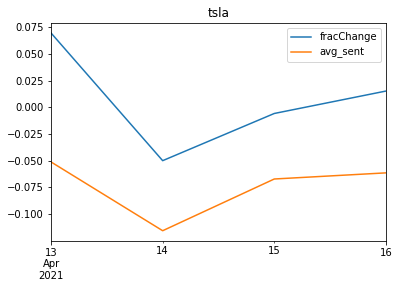

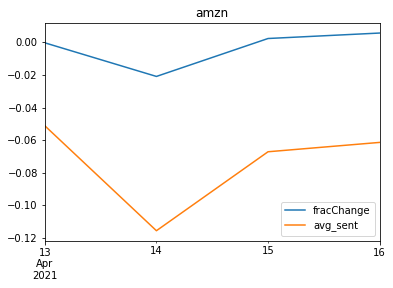

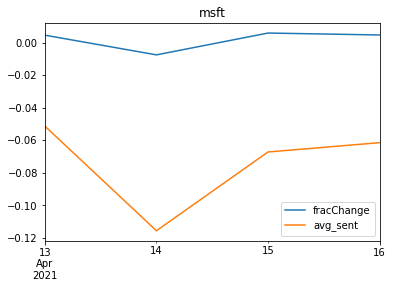

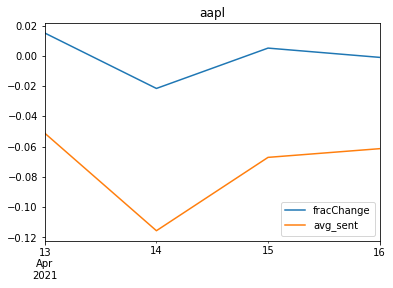

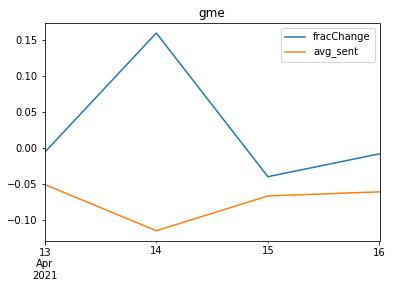

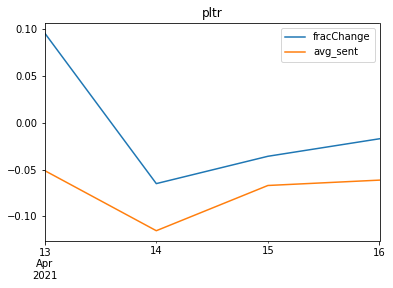

In [101]:
for ticker in tickers:
    _ = data[data['ticker']==ticker].plot(title=ticker)

# Linear regression

trying to capture the relationship between previous days average sentiment (x) and next days fractional change (y)

In [144]:
lin_data = data[data['ticker'] != 'gme']
x = np.array(lin_data['avg_sent'])
y = np.array(lin_data['fracChange'])

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model = LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))

In [147]:
y_pred = model.predict(x.reshape(-1,1))

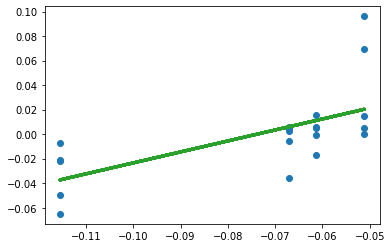

In [148]:
plt.scatter(x,y,c='tab:blue')
plt.plot(x,y_pred,c='tab:green',lw=3)

In [175]:
tsla_data = tsla_data[1:]

In [176]:
tsla_data

,open,high,low,close,volume
dt,,,,,
2021-04-13,712.700012,763.000000,710.659973,762.320007,44652800
2021-04-14,770.700012,780.789978,728.030029,732.229980,49017400
2021-04-15,743.099976,743.690002,721.309998,738.849976,27848900
2021-04-16,728.650024,749.409973,724.599976,739.780029,27924000


# Using fitted regression model to predict

In [177]:
true_closes = tsla_data['close'].values
true_opens = tsla_data['open'].values
obs = lin_data[lin_data['ticker']=='tsla']['avg_sent'].values

In [178]:
obs

array([-0.05114812, -0.11553369, -0.0670908 , -0.06134922])

In [179]:
preds = []
for i in range(len(true_closes)):
    pred_change = model.predict(obs[i].reshape(-1,1))
    pred_close = pred_change[0]*true_opens[i]+true_opens[i]
    preds.append(pred_close)

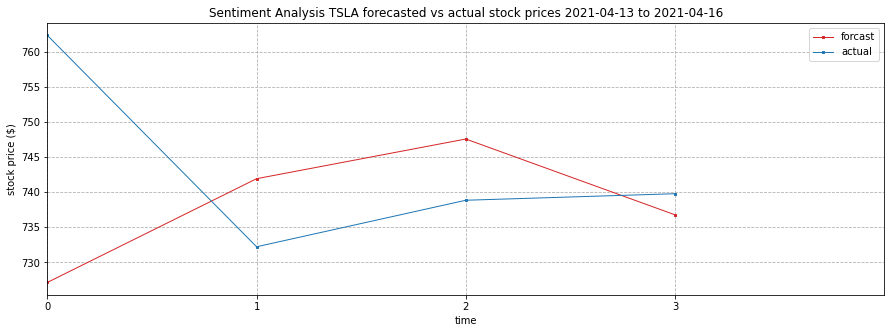

In [180]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Sentiment Analysis TSLA forecasted vs actual stock prices 2021-04-13 to 2021-04-16')
time = range(len(preds))
ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='forcast')
ax.plot(time,true_closes,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),1))
ax.set_xlim(0,len(preds))
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [181]:
amzn_data = get_stock_data('AMZN',start_date,end_date)
amzn_data = amzn_data[1:]
true_closes = amzn_data['close'].values
true_opens = amzn_data['open'].values
obs = lin_data[lin_data['ticker']=='amzn']['avg_sent'].values
preds = []
for i in range(len(true_closes)):
    pred_change = model.predict(obs[i].reshape(-1,1))
    pred_close = pred_change[0]*true_opens[i]+true_opens[i]
    preds.append(pred_close)

[*********************100%***********************]  1 of 1 completed


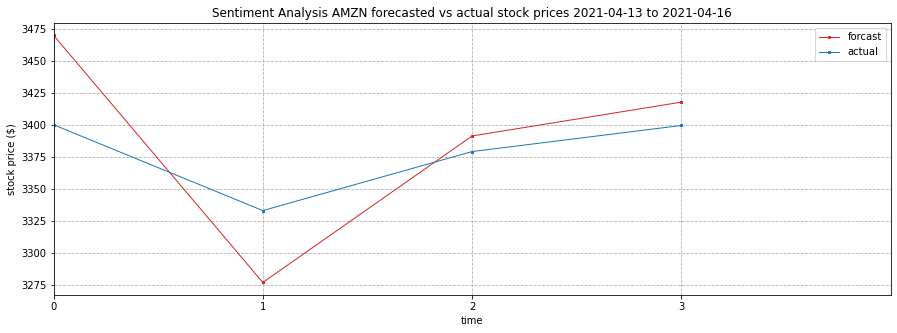

In [182]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Sentiment Analysis AMZN forecasted vs actual stock prices 2021-04-13 to 2021-04-16')
time = range(len(preds))
ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='forcast')
ax.plot(time,true_closes,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),1))
ax.set_xlim(0,len(preds))
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [185]:
msft_data = get_stock_data('MSFT',start_date,end_date)
msft_data = msft_data[1:]
true_closes = msft_data['close'].values
true_opens = msft_data['open'].values
obs = lin_data[lin_data['ticker']=='msft']['avg_sent'].values
preds = []
for i in range(len(true_closes)):
    pred_change = model.predict(obs[i].reshape(-1,1))
    pred_close = pred_change[0]*true_opens[i]+true_opens[i]
    preds.append(pred_close)

[*********************100%***********************]  1 of 1 completed


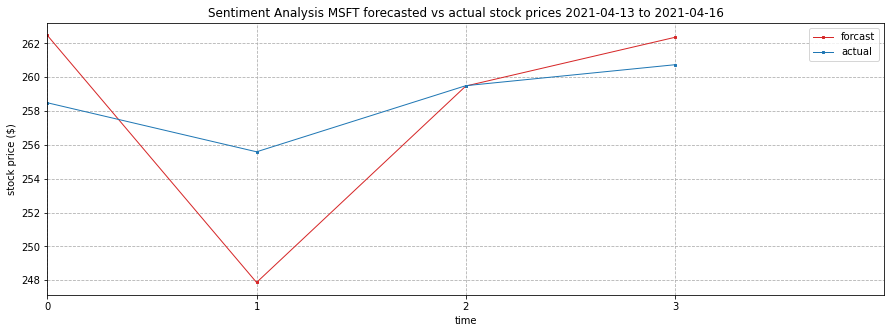

In [186]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Sentiment Analysis MSFT forecasted vs actual stock prices 2021-04-13 to 2021-04-16')
time = range(len(preds))
ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='forcast')
ax.plot(time,true_closes,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),1))
ax.set_xlim(0,len(preds))
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [187]:
aapl_data = get_stock_data('AAPL',start_date,end_date)
aapl_data = aapl_data[1:]
true_closes = aapl_data['close'].values
true_opens = aapl_data['open'].values
obs = lin_data[lin_data['ticker']=='aapl']['avg_sent'].values
preds = []
for i in range(len(true_closes)):
    pred_change = model.predict(obs[i].reshape(-1,1))
    pred_close = pred_change[0]*true_opens[i]+true_opens[i]
    preds.append(pred_close)

[*********************100%***********************]  1 of 1 completed


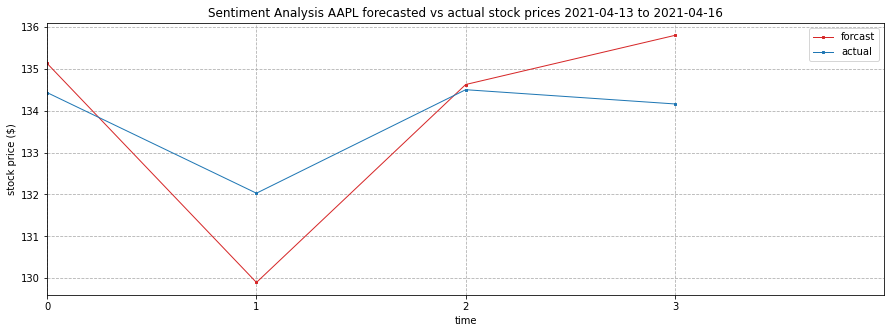

In [188]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Sentiment Analysis AAPL forecasted vs actual stock prices 2021-04-13 to 2021-04-16')
time = range(len(preds))
ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='forcast')
ax.plot(time,true_closes,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),1))
ax.set_xlim(0,len(preds))
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [189]:
pltr_data = get_stock_data('PLTR',start_date,end_date)
pltr_data = pltr_data[1:]
true_closes = pltr_data['close'].values
true_opens = pltr_data['open'].values
obs = lin_data[lin_data['ticker']=='pltr']['avg_sent'].values
preds = []
for i in range(len(true_closes)):
    pred_change = model.predict(obs[i].reshape(-1,1))
    pred_close = pred_change[0]*true_opens[i]+true_opens[i]
    preds.append(pred_close)

[*********************100%***********************]  1 of 1 completed


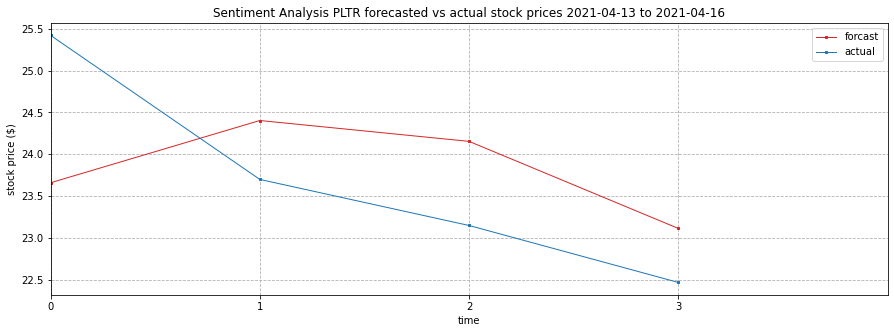

In [190]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Sentiment Analysis PLTR forecasted vs actual stock prices 2021-04-13 to 2021-04-16')
time = range(len(preds))
ax.plot(time,preds,color='tab:red',marker='s',markersize=2,linestyle='-',linewidth=1,label='forcast')
ax.plot(time,true_closes,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),1))
ax.set_xlim(0,len(preds))
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()